In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Analise estatística
from scipy.stats import pearsonr

# Bibliotecas dos modelos a serem aplicados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Ferramentas para o pré-processamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Métricas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, plot_confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Definição do nome das colunas
colunas = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [0]:
# Leitura do dataset
wine = pd.read_csv('winequality-red.csv', sep=';', names = colunas, header=0)

In [4]:
# Visualizar as primeiras linhas do dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Analisando as dimensões do dataset, o tipo dos dados e a quantidade de NaN
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [79]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Analisando os dados estatísticos das variáveis do dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
pearson_corr6, _ = pearsonr(wine['fixed acidity'],wine['pH'])
print("coeficiente de correlação de Pearson entre as variáveis 'fixed acidity' e 'pH' é: {}".format(pearson_corr6))

coeficiente de correlação de Pearson entre as variáveis 'fixed acidity' e 'pH' é: -0.6829781945685314


In [8]:
pearson_corr7, _ = pearsonr(wine['quality'],wine['alcohol'])
print("coeficiente de correlação de Pearson entre as variáveis 'quality' e 'alcohol' é: {}".format(pearson_corr7))

coeficiente de correlação de Pearson entre as variáveis 'quality' e 'alcohol' é: 0.47616632400113607


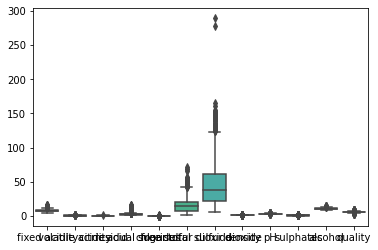

In [9]:
# Imprimindo gráfico Boxplot
#sns.boxplot(x="variable", y="value", data=pd.melt(wine.iloc[:,:5]))
sns.boxplot(data=wine)

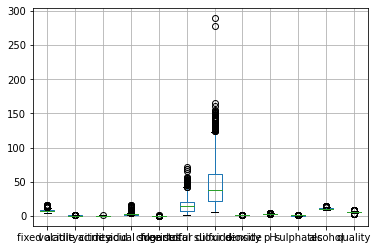

In [10]:
# # Imprimindo gráfico Boxplot
wine.boxplot()

In [0]:
# Normalizar os dados
scaler = MinMaxScaler()

In [0]:
wine_transformed = pd.DataFrame(scaler.fit_transform(wine.iloc[:,:-1]))

In [13]:
wine_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [0]:
# Definindo variável dependente e variáveis independentes
Y = wine.iloc[:,-1]
X = pd.DataFrame(scaler.fit_transform(wine.iloc[:,:-1]))

In [15]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [16]:
X[0].min()

0.0

In [17]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [19]:
Y[Y==5].count()

681

In [20]:
Y.unique()

array([5, 6, 7, 4, 8, 3])

In [64]:
set(Y)

{3, 4, 5, 6, 7, 8}

In [0]:
# Gerando dados para treino e teste
trainX, testX, trainY, testY = train_test_split(X, Y, random_state=1, train_size = 0.7)

In [22]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 126 to 1061
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1119 non-null   float64
 1   1       1119 non-null   float64
 2   2       1119 non-null   float64
 3   3       1119 non-null   float64
 4   4       1119 non-null   float64
 5   5       1119 non-null   float64
 6   6       1119 non-null   float64
 7   7       1119 non-null   float64
 8   8       1119 non-null   float64
 9   9       1119 non-null   float64
 10  10      1119 non-null   float64
dtypes: float64(11)
memory usage: 104.9 KB


In [23]:
trainX.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.329941,0.281416,0.269294,0.111679,0.126714,0.205648,0.140042,0.490390,0.451627,0.197658,0.314855
std,0.158343,0.122311,0.198958,0.091429,0.079310,0.144358,0.114618,0.141039,0.124206,0.102821,0.165340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.191781,0.090000,0.068493,0.098497,0.084507,0.056537,0.403451,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.250000,0.089041,0.113523,0.169014,0.109541,0.494126,0.448819,0.173653,0.276923
75%,0.411504,0.356164,0.420000,0.116438,0.131886,0.281690,0.190813,0.573421,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,0.890411,0.998331,1.000000,0.961131,0.960352,1.000000,1.000000,1.000000


## Algoritmo KNN

In [0]:
# definir o modelo
clf_KNN = KNeighborsClassifier(n_neighbors=5)

In [25]:
# Treinar o modelo
clf_KNN.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_predicted = clf_KNN.predict(testX)

In [27]:
print("Accuracy:", accuracy_score(testY, knn_predicted))

Accuracy: 0.5645833333333333


In [28]:
print("Matriz de Confusão:\n",confusion_matrix(testY, knn_predicted))

Matriz de Confusão:
 [[  1   0   1   0   0   0]
 [  0   1  14   5   1   0]
 [  0   0 148  54   5   0]
 [  0   1  71 102  21   0]
 [  0   1   9  23  19   0]
 [  0   0   0   1   2   0]]


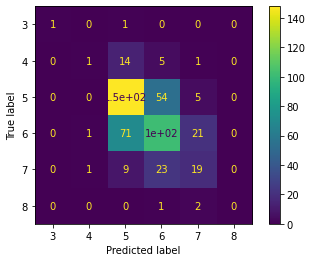

In [29]:
plot_confusion_matrix(clf_KNN, testX, testY)

In [30]:
print("Relatório Classificação:\n", classification_report(testY, knn_predicted))

Relatório Classificação:
               precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.66       207
           6       0.55      0.52      0.54       195
           7       0.40      0.37      0.38        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.36      0.39       480
weighted avg       0.55      0.56      0.55       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print("R2 Squared:", r2_score(testY, knn_predicted))

R2 Squared: 0.0039292310544744025


## Algoritmo Árvore de Decisão

In [0]:
clf_arvore = DecisionTreeClassifier()

In [33]:
clf_arvore.fit(trainX, trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
tree_predicted = clf_arvore.predict(testX)

In [35]:
print("Accuracy:", accuracy_score(testY, tree_predicted))
print("\nMatriz de Confusão:\n",confusion_matrix(testY, tree_predicted))
print("\nR2 Squared:", r2_score(testY, tree_predicted))
print("\nRelatório Classificação:\n", classification_report(testY, tree_predicted))

Accuracy: 0.5854166666666667

Matriz de Confusão:
 [[  0   0   0   2   0   0]
 [  2   1  10   6   2   0]
 [  1   6 143  48   8   1]
 [  0   3  64 107  20   1]
 [  0   1   4  15  29   3]
 [  0   0   0   0   2   1]]

R2 Squared: -0.0816438590611206

Relatório Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.09      0.05      0.06        21
           5       0.65      0.69      0.67       207
           6       0.60      0.55      0.57       195
           7       0.48      0.56      0.51        52
           8       0.17      0.33      0.22         3

    accuracy                           0.59       480
   macro avg       0.33      0.36      0.34       480
weighted avg       0.58      0.59      0.58       480



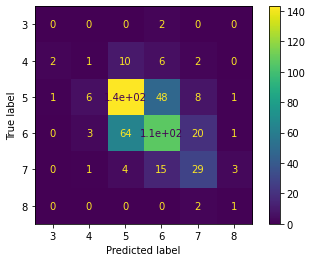

In [36]:
plot_confusion_matrix(clf_arvore, testX, testY)

## Algoritmo Floresta Randômica

In [0]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

In [38]:
clf_floresta.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
forest_predicted = clf_floresta.predict(testX)

In [40]:
print("Accuracy:", accuracy_score(testY, forest_predicted))
print("\nMatriz de Confusão:\n",confusion_matrix(testY, forest_predicted))
print("\nR2 Squared:", r2_score(testY, forest_predicted))
print("\nRelatório Classificação:\n", classification_report(testY, forest_predicted))

Accuracy: 0.6791666666666667

Matriz de Confusão:
 [[  0   0   2   0   0   0]
 [  0   0  14   7   0   0]
 [  0   0 167  38   2   0]
 [  0   0  46 136  13   0]
 [  0   0   5  24  23   0]
 [  0   0   0   1   2   0]]

R2 Squared: 0.29830066105212116

Relatório Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.70      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.66       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


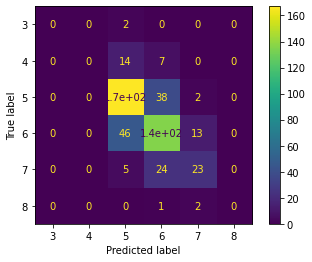

In [41]:
plot_confusion_matrix(clf_floresta, testX, testY)

## Algoritmo SVM

In [0]:
clf_svm=SVC(gamma='auto',kernel='rbf')

In [43]:
clf_svm.fit(trainX, trainY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_predicted = clf_svm.predict(testX)

In [45]:
print("Accuracy:", accuracy_score(testY, svm_predicted))
print("Matriz de Confusão:\n",confusion_matrix(testY, svm_predicted))
print("\nR2 Squared:", r2_score(testY, svm_predicted))
print("\nRelatório Classificação:\n", classification_report(testY, svm_predicted))

Accuracy: 0.5854166666666667
Matriz de Confusão:
 [[  0   0   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   0 177  30   0   0]
 [  0   0  91 104   0   0]
 [  0   0   6  46   0   0]
 [  0   0   0   3   0   0]]

R2 Squared: 0.1545378696579216

Relatório Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.61      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.49      0.59      0.53       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


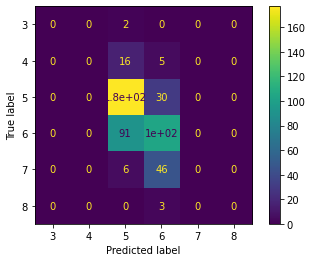

In [46]:
plot_confusion_matrix(clf_svm, testX, testY)

## Algoritmo Rede MLP

In [0]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

In [48]:
clf_mlp.fit(trainX, trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
mlp_predicted = clf_mlp.predict(testX)

In [50]:
print("Accuracy:", accuracy_score(testY, mlp_predicted))
print("Matriz de Confusão:\n",confusion_matrix(testY, mlp_predicted))
print("\nR2 Squared:", r2_score(testY, mlp_predicted))
print("\nRelatório Classificação:\n", classification_report(testY, mlp_predicted))

Accuracy: 0.6
Matriz de Confusão:
 [[  0   0   2   0   0   0]
 [  0   0  15   5   1   0]
 [  0   0 165  42   0   0]
 [  0   0  73 111  11   0]
 [  0   0   5  35  12   0]
 [  0   0   0   1   2   0]]

R2 Squared: 0.18192125849491203

Relatório Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.80      0.71       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.56      0.60      0.57       480



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


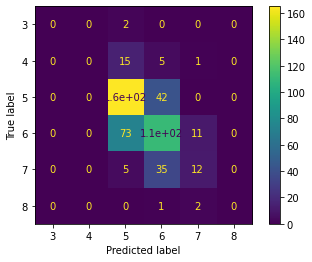

In [51]:
plot_confusion_matrix(clf_mlp, testX, testY)

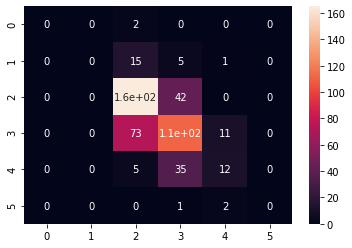

In [52]:
sns.heatmap(confusion_matrix(testY, mlp_predicted), annot=True)

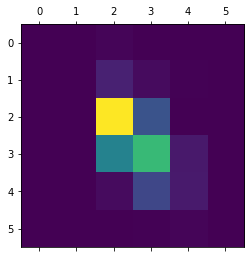

In [53]:
plt.matshow(confusion_matrix(testY, mlp_predicted))

## Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3).

In [58]:
# Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?
Y_bin = pd.Series(np.where(Y > 5, 'bom', 'ruim'))
Y_bin

0       ruim
1       ruim
2       ruim
3        bom
4       ruim
        ... 
1594    ruim
1595     bom
1596     bom
1597    ruim
1598     bom
Length: 1599, dtype: object

In [59]:
Y_bin[Y_bin == 'ruim'].count()

744

In [65]:
Y[Y <= 5].count()

744

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_bin, train_size = 0.7, random_state=1)

In [0]:
model_floresta = RandomForestClassifier(max_depth=10, random_state=1)

In [72]:
model_floresta.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
floresta_predicted = model_floresta.predict(X_test)

In [75]:
print("Accuracy:", accuracy_score(Y_test, floresta_predicted))
print("\nMatriz de Confusão:\n",confusion_matrix(Y_test, floresta_predicted))
#print("\nR2 Squared:", r2_score(Y_test, floresta_predicted))
print("\nRelatório Classificação:\n", classification_report(Y_test, floresta_predicted))

Accuracy: 0.8041666666666667

Matriz de Confusão:
 [[200  50]
 [ 44 186]]

Relatório Classificação:
               precision    recall  f1-score   support

         bom       0.82      0.80      0.81       250
        ruim       0.79      0.81      0.80       230

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480

